<h1>Data Preparation

<h2> Importing

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import os
import warnings
import sys

In [2]:
# suppressing warning messages

warnings.filterwarnings('ignore')

In [3]:
# Setting path to files

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_customers_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)


In [4]:
# importing data cleaning and summarizing scripts

from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar

cleaner = Cleaner()
sumar = Sumar()

In [5]:
# Importing data

original_df = pd.read_csv(data_path)

<h2> Data Cleaning

In [6]:
# Observing data features

original_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
# Observing number of rows and columns

original_df.shape

(150001, 55)

In [8]:
# Observing available features

original_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [9]:
# Extracting Relevant Features

keep_list = ['Bearer Id','Dur. (ms)','MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Handset Manufacturer','Handset Type','Social Media DL (Bytes)','Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)']
cleaned_df_p = cleaner.remove_cols(original_df, keep_list, True)
print(sumar.percent_missing(cleaned_df_p))
sumar.summ_columns(cleaned_df_p)

The dataset contains 6.02 % missing values.
None


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,991,1.0,float64,134709
1,Dur. (ms),1,0.0,float64,89526
2,MSISDN/Number,1066,1.0,float64,106857
3,Avg RTT DL (ms),27829,19.0,float64,2131
4,Avg RTT UL (ms),27812,19.0,float64,723
5,Avg Bearer TP DL (kbps),1,0.0,float64,41754
6,Avg Bearer TP UL (kbps),1,0.0,float64,14529
7,TCP DL Retrans. Vol (Bytes),88146,59.0,float64,54400
8,TCP UL Retrans. Vol (Bytes),96649,64.0,float64,35121
9,Handset Manufacturer,572,0.0,object,171


In [10]:
# Changing the id features to categorical variables.

cleaned_df_p2 = cleaned_df_p.astype({"Bearer Id": str, "MSISDN/Number": str})

In [11]:
# Filling categorical variables with mode

cleaned_df_p3 = cleaner.fill_missing_by_mode(cleaned_df_p2) 

# Filling Numerical variables with mean

cleaned_df_p4 = cleaner.fill_missing_by_mean(cleaned_df_p3) 
sumar.summ_columns(cleaned_df_p4)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,object,134709
1,Dur. (ms),0,0.0,float64,89525
2,MSISDN/Number,0,0.0,object,106857
3,Avg RTT DL (ms),0,0.0,float64,2130
4,Avg RTT UL (ms),0,0.0,float64,722
5,Avg Bearer TP DL (kbps),0,0.0,float64,41753
6,Avg Bearer TP UL (kbps),0,0.0,float64,14528
7,TCP DL Retrans. Vol (Bytes),0,0.0,float64,54399
8,TCP UL Retrans. Vol (Bytes),0,0.0,float64,35121
9,Handset Manufacturer,0,0.0,object,170


In [13]:
cleaned_df_p4.columns

Index(['Bearer Id', 'Dur. (S)', 'MSISDN/Number', 'Avg RTT DL (S)',
       'Avg RTT UL (S)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (MB)', 'TCP UL Retrans. Vol (MB)',
       'Handset Manufacturer', 'Handset Type', 'Social Media DL (MB)',
       'Social Media UL (MB)', 'Google DL (MB)', 'Google UL (MB)',
       'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)',
       'Netflix DL (MB)', 'Netflix UL (MB)', 'Gaming DL (MB)',
       'Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)', 'Total UL (MB)',
       'Total DL (MB)'],
      dtype='object')

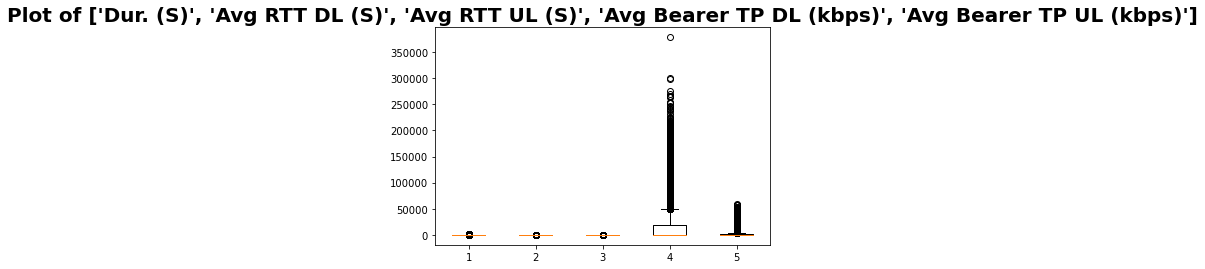

In [17]:
#Checking for outliers
outlier_checklist = ['Dur. (S)', 'Avg RTT DL (S)',
       'Avg RTT UL (S)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
sumar.plot_box(cleaned_df_p4, outlier_checklist)

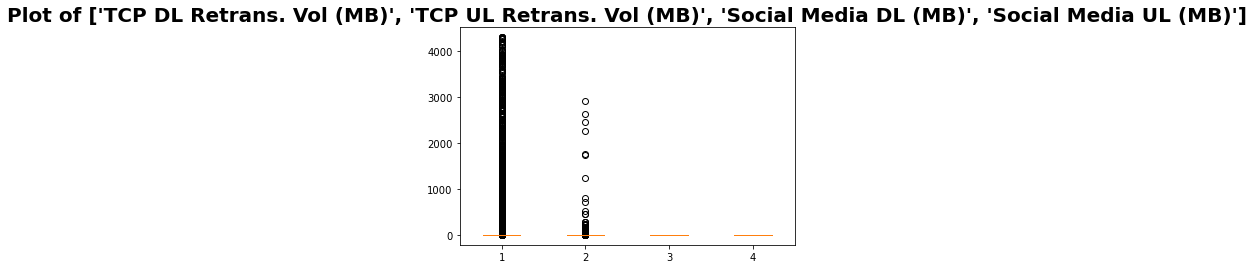

In [20]:
outlier_checklist2 = ['TCP DL Retrans. Vol (MB)', 'TCP UL Retrans. Vol (MB)', 'Social Media DL (MB)',
       'Social Media UL (MB)']
sumar.plot_box(cleaned_df_p4, outlier_checklist2)

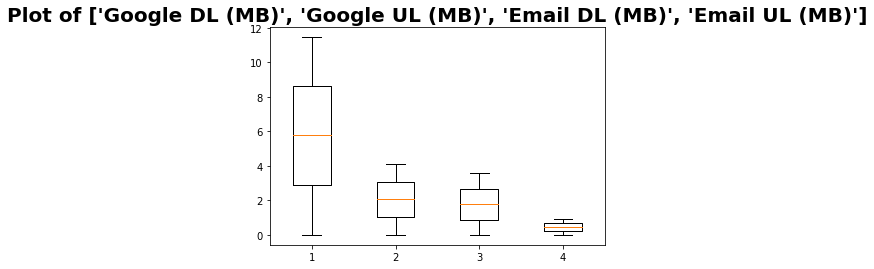

In [21]:
outlier_checklist3 = ['Google DL (MB)', 'Google UL (MB)',
       'Email DL (MB)', 'Email UL (MB)' ]
sumar.plot_box(cleaned_df_p4, outlier_checklist3)

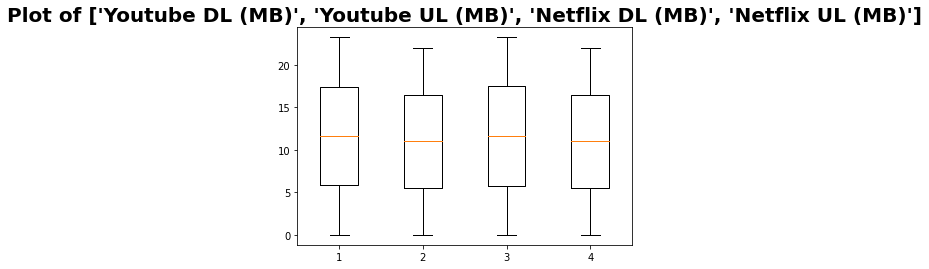

In [22]:
outlier_checklist4 = ['Youtube DL (MB)', 'Youtube UL (MB)',
       'Netflix DL (MB)', 'Netflix UL (MB)']
sumar.plot_box(cleaned_df_p4, outlier_checklist4)

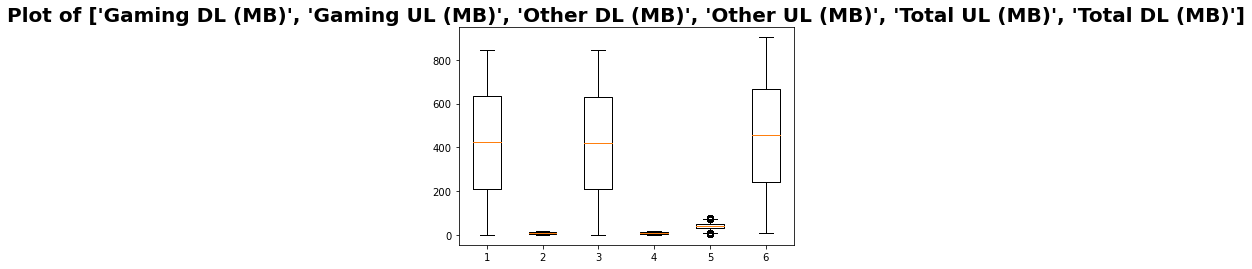

In [23]:
outlier_checklist5 = ['Gaming DL (MB)',
       'Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)', 'Total UL (MB)',
       'Total DL (MB)']
sumar.plot_box(cleaned_df_p4, outlier_checklist5)

**Observation**
<li> the following features have an outlier: 'Dur. (S)', 'Avg RTT DL (S)','Avg RTT UL (S)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (MB)', 'TCP UL Retrans. Vol (MB)','Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)', 'Total UL (MB)'
<li> the rest of the variables are free from outliers.

In [12]:
# Converting Bytes to MB.

cleaned_df_p5 = cleaner.byte_to_mb(cleaned_df_p4, "(Bytes)")

# Converting ms to s

cleaned_df_p6 = cleaner.ms_to_s(cleaned_df_p5, "(ms)")

sumar.summ_columns(cleaned_df_p6)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,object,134709
1,Dur. (S),0,0.0,float64,89525
2,MSISDN/Number,0,0.0,object,106857
3,Avg RTT DL (S),0,0.0,float64,2130
4,Avg RTT UL (S),0,0.0,float64,722
5,Avg Bearer TP DL (kbps),0,0.0,float64,41753
6,Avg Bearer TP UL (kbps),0,0.0,float64,14528
7,TCP DL Retrans. Vol (MB),0,0.0,float64,54399
8,TCP UL Retrans. Vol (MB),0,0.0,float64,35121
9,Handset Manufacturer,0,0.0,object,170


In [ ]:
# Saving Cleaned DataFrame.

save_data_path = os.path.join(parent_dir,"data","teleco_clean_data.csv") # setting path to data directory
aggr_df.to_csv(save_data_path, index=False)
df3.to_csv(save_data_path_2, index=False)
outlier_free_df.to_csv(save_data_path_3, index=False)